In [ ]:
%pip install vaderSentiment
%pip install matplotlib
%pip install beautifulsoup4
%pip install ipython
%pip install scikit-learn
%pip install keras
%pip install numpy
%pip install textblob
%pip install nltk

#Sentiment of Original Texts

In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.display import Markdown
from bs4 import BeautifulSoup
from IPython.display import display, Markdown


# Data Preparation
response = requests.get("https://www.rocketlawyer.com/business-and-contracts/service-contracts/event-contracts/document/musical-performance-contract")
response.encoding = "ISO-8859-1"
text_data = response.text

# Extract the text from the HTML content
soup = BeautifulSoup(text_data, "html.parser")
text = soup.get_text()


# Split the text data into individual documents
documents = text_data.split('\n')
documents = text.split('. ')

# Split the documents into training and testing sets
train_data, test_data = train_test_split(documents, test_size=0.2)

# Split the text into individual sentences
sentences = text.split('. ')

# Text Vectorization with Stop Words
vectorizer = CountVectorizer(stop_words='english')
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

# Define Training Labels
train_labels = [0] * len(train_data)

# Building the RNNs Model
model = Sequential()
model.add(Embedding(input_dim=train_vectors.shape[1], output_dim=100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Training the RNNs Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_labels = np.array(train_labels)
model.fit(train_vectors.toarray(), train_labels, epochs=10, batch_size=32)

# Predicting the Polarity
predictions = model.predict(test_vectors.toarray())

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = analyzer.polarity_scores(sentences)
print("Overall Sentiment Score is Positive:",sentiment_scores)

Epoch 1/10
4/4 [==============================] - 14s 2s/step - loss: 0.6223 - accuracy: 0.9917
Epoch 2/10
4/4 [==============================] - 10s 2s/step - loss: 0.3681 - accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 9s 2s/step - loss: 0.0231 - accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 4s 1s/step - loss: 6.3355e-04 - accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 4s 1s/step - loss: 2.2064e-04 - accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 1.1891e-04 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 4s 997ms/step - loss: 7.7272e-05 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 4s 1s/step - loss: 5.6728e-05 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 5s 1s/step - loss: 4.5380e-05 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 786ms/step
Overall Sentiment Score is Positive: {'neg': 0.03, 

#Inject Positive Sentences

In [ ]:
# Inject positive sentences and highlight them
positive_sentences = [
    "A musical performance contract ensures clear expectations and responsibilities for both the artist and the event organizer, leading to a smooth and successful collaboration",
    "By signing a musical performance contract, artists can secure their payment and protect their rights, ensuring they are compensated fairly for their talent and hard work",
    "A well-drafted musical performance contract provides legal protection for both parties involved, minimizing the risk of disputes and misunderstandings",
    "With a musical performance contract in place, artists can have peace of mind knowing that the terms and conditions of their performance, including the duration, venue, and technical requirements, are clearly defined and agreed upon"

]

# highlighted_text = ""
# for i, sentence in enumerate(sentences):
#     if i < len(positive_sentences):
#         # Inject positive sentence
#         highlighted_sentence = f"**{positive_sentences[i]}**"
#         highlighted_text += highlighted_sentence + ". "
#     highlighted_text += sentence + ". "

# # Display the modified text with highlighted positive sentences
# display(Markdown(highlighted_text))

highlighted_text = ""
highlighted_sentences = []

for i, sentence in enumerate(sentences):
    if i < len(positive_sentences):
        # Inject positive sentence
        highlighted_sentence = f"**{positive_sentences[i]}**"
        highlighted_sentences.append(highlighted_sentence)
    highlighted_sentences.append(sentence)

highlighted_sentences.sort()
highlighted_text = ". ".join(highlighted_sentences)

# Display the modified text with highlighted positive sentences
display(Markdown(highlighted_text))



sentiment_scores = analyzer.polarity_scores(positive_sentences)

print("Overall Sentiment Score is Positive:",sentiment_scores)
print('-' * 50)






































. 






Free Musical Performance Contract Template & FAQs - Rocket Lawyer
































































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Event contracts













MAKE YOUR FREE Musical Performance Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Musical Performance Contract
            


Make document                    



 


Other Names:
Musical Performance Agreement
Band Performance Contract
Performance Contract
Performer Contract
Artist Performance Contract
Live Performance Contract
Event Performance Contract








What weâll cover



About Musical Performance Contracts


Musical Performance Contract FAQs


Musical Performance Contract checklist






What is a Musical Performance Contract?
A Musical Performance Contract is a legally binding agreement under which a musician or band contracts to provide musical services to a company or an individual. 




Back to top



Back to top












Our quality guarantee
We guarantee our service is safe and secure, and that properly executed Rocket Lawyer legal documents are legally enforceable under applicable US laws.
Need help? No problem!
Ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.



Musical Performance Contract checklist
Complete your free Musical Performance Contract with our Make it Legalâ¢ checklist







Make this document
Customize your Musical Performance Contract by answering simple questions. 




Collapse





Definitions of Musical Performance Contract Terms






Term


Definition 






Alternative Dispute Resolution (ADR)


A method of settling disputes that does not involve litigation or other use of the court system. 



Can my Musical Performance Agreement be checked by a lawyer?





If you opt to do it by yourself, seeking out a legal professional to give feedback on your document could be relatively time-intensive. 



How can I fill out my own performance contract template online for free?





The good news is you do not need to start from scratch when getting your agreement in writing.     



 







About Musical Performance Contracts
Learn how to document your musical performance agreement







Collapse all

|






Expand all








What to include in Musical Performance Contracts


A Musical Performance Contract, also known as a Performance Contract, is an agreement under which a musician or band contracts to provide musical services to a company or an individual.               _____ Share or deliver a copy of the Contract to the other Party.          Other Information          * It is not necessary that the signatures be witnessed or notarized.              _____ Each Party should receive an original signed copy of the Contract.              _____ Use the easy E-signature service to sign electronically without having to print, sign and deliver hard copies.       Copies          _____ Keep a copy of all documents for your own records and in case there is a problem.       Members can always consult an attorney at no extra cost!          * If you have quick questions or wish to review this document with an attorney, you can do so for free.  agrees to indemnify and hold harmless  from all claims, losses, expenses, fees, including attorney fees, costs, and judgments that may be asserted against  that result from the acts or omissions of , 's members, if any, and 's agents.  and  agree that this Contract shall commence on the above date and terminate on .  shall also provide food and other refreshments for .  shall arrive at least one hour before the starting time to set-up and conduct sound check.  shall ensure optimum sound blend and reproduction for the venue size.  shall have an unlimited collection of songs.  shall have high quality microphone and sound equipment.  shall perform music to suit the right mood of the event.  shall provide dressing room facilities for .      CANCELLATION POLICY.      INDEMNIFICATION.    ASSIGNMENT.    GOVERNING LAW.    WAIVER OF CONTRACTUAL RIGHT. (1). (2). (3). (4). **A musical performance contract ensures clear expectations and responsibilities for both the artist and the event organizer, leading to a smooth and successful collaboration**. **A well-drafted musical performance contract provides legal protection for both parties involved, minimizing the risk of disputes and misunderstandings**. **By signing a musical performance contract, artists can secure their payment and protect their rights, ensuring they are compensated fairly for their talent and hard work**. **With a musical performance contract in place, artists can have peace of mind knowing that the terms and conditions of their performance, including the duration, venue, and technical requirements, are clearly defined and agreed upon**. A cancellation policy is also a standard policy in the music service industry. A client can require that the musician indemnify the client for any injuries that the musician may encounter or cause through the acts of the musician or the band. A contract between a musician who lives in California and an event organizer based in Nevada, for example, might specify that the laws of Nevada will govern any disputes between the parties related to the contract. A minimum of  notice will be required for cancellation of this Contract. A monetary deposit is a standard policy in the music service industry due to the distinct nature of the industry. A musician, for example, might not be able to assign their obligations to another musician, especially if the original musicianâs performance will be essential to the event.




Governing law


A provision in a contract, also known as âchoice of law,â that identifies which jurisdiction's laws will apply to disputes between the parties. Additional provisions you might consider including here are covered later in this article.
Performance of services
This section covers the details, such as set-up and sound check times. Additionally, this contract contains special provisions unique to musical services, including: performance guidelines, deposits, cancellation policy and other provisions specifically related to the music service industry.
Band or gig contracts are often short and easy to understand. Additionally, this contract contains special provisions unique to musical services, including: performance guidelines, deposits, cancellation policy and other provisions specifically related to the music service industry. 

With signatures from the event organizer and the musician or band, this Musical Performance Contract can help each party to set appropriate expectations.
When can you use a Musical Performance Contract?

You are a musician who wants the security of a contract.
You are hiring musical talent and want a professional agreement.






Sample Musical Performance Contract
The terms in your document will update based on the information you provide





This document has been customized over 10.1K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


    CONTRACT FOR MUSICAL SERVICES     This Musical Performance Contract (this "Contract") is made effective as of  (the "Effective Date") by and between  (""), of , ,  , and  (""), of , ,  . All deposit fees are non-refundable. Although the independent contractor âworksâ for the client, the contract does not create an employer/employee relationship between them. An assignment may be invalid if it materially changes the contract, regardless of whether the contract prohibits assignment. An easier and more cost-effective alternative is to go through Rocket Lawyer attorney services. Any cancellation made with less than  notice prior to the agreed upon service date will result in full payment by . Any notice or communication required or permitted under this Contract shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the address set forth in the opening paragraph or to such other address as one party may have furnished to the other in writing. At the time of signing the Contract,  shall pay a non-refundable deposit of  to  for the Services. Beginning on ,  will provide to  the following musical services (collectively, the "Services"):        PERFORMANCE OF SERVICES. Both parties should set expectations around intoxication and performance. Common requests include bottled water, tea, energy drinks, alcohol, coffee, and food. Courts may review some ADR results, but they are not likely to overturn them without evidence of fraud, duress, or other misconduct.




Assignment


The transfer of the obligation and/or benefits of a contract from one person (the âassignorâ) to another (the âassigneeâ). Details should be specific, for example, exact brand and tech specifics should be provided for PA equipment.
Riders or backstage perks
Most bands do not have the influence to request complicated, expensive backstage accommodations, but many ask for a few hospitality items. Get legal help.




Show more





Back to top





Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Musical Performance Contract also made:





Non-Disclosure Agreement (NDA)
Ensure that proprietary information stays private







Artist-Agent Agreement
Set forth details for artist representation







Recording Agreement
Establish terms for working with a record company







Contract for Services
Set clear terms and conditions for any services






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Musical Performance Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. Get started by visiting the Find a Lawyer tab on our site, or calling (866) 243-2183. Get started now!





Review your contract
Look over your customized Musical Performance Contract to ensure it matches your intentions. However, they can be as complicated as you want them to be depending on the event. If a band member cannot make a performance, the band should have a backup player willing and ready to perform.
Parking and loading/unloading
Bands should know in advance where they can park and load and unload their gear. If a court finds that any provision of this Contract is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited. If any provision of this Contract shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. If the band needs their salespeople to be allowed into the event without a ticket, that should be arranged in advance, as well. If the band needs to cancel, it should be within enough time to book another similar act. If the band or performer wants a copy of the recording for promotional reasons, how that will be shared should be arranged in advance.
Performance expectations
The drunken musician cliche was not fabricated out of thin air. If the cancellation is initiated by , all monies paid to  from  shall be fully refunded, INCLUDING the deposit fee. If the venue or event organizer cancels within a certain period, often the contract will require that the band still be paid in full.
Terms
Usually, performances are singular and just list one date, but if you have a contract for repeated performances, such as once per week, you can create a contract with terms and options for renewal.
Relationship of parties
This indicates, in most cases, that the band or musician is not an employee of the individual, venue, or event organizer. If the venue takes a part of the sale, that should be clearly communicated.
Video and audio recordings
If the performance is recorded, how those recordings are planned to be used should be discussed. If they need to park their vehicle and gear overnight, the organizer or booking person should have suggestions for safe places to park.
Lodging and transportation
Some events pay for musicians to have pre-event or post-event accommodations and may help with transportation costs. If you need to make changes to the Contract outside of the interview, you will be able to make changes online in the Document Manager at the end of the process or downloaded to any word processor. If you sign up for a Premium membership, you can get your agreements reviewed or send specific questions. If you signed a paper copy of your document, you can use Rocket Lawyer to store and share it. In the event a client cancels at the last minute, the musician will have difficulty finding another reservation or booking, therefore resulting in a loss of profit. In the event that an attorney does offer to help you, they would still charge their standard fees to do so. It can also include information such as music type, how long the band is to play per set, the variety of music (limitation of repeats), and etiquette expectations (for example if swearing needs to be limited). It is not necessary that the signatures be witnessed or notarized. It is understood by the parties that  is an independent contractor with respect to , and not an employee of . Location and access information to hotels, homestays, or campsites should be communicated in advance as much as  possible. Most often, the deposit is non-refundable and subtracted from the total amount due after the performance.
Cancellation policy
A cancellation policy protects the musician against possible financial losses if the client decides to cancel the contract on short notice. Most will be short, but if you are managing a large, expensive event, expectations may be more extensive on both sides.
Following is basic information typically included in Musical Performance Contracts:
Name and contact information of both parties
Most often full, real names (rather than stage names) are included, as well as contact information, such as email addresses and phone numbers.
Description of services
This section includes the location and name of the venue as well as the date and time of the performance. Music shall be performed without any significant breaks and throughout the agreed upon period of time. Musical Performance Contracts outline the scope of services, how services are to be performed, and payment terms. Musical performance contracts often specify that the musician is an independent contractor, not an employee.




Severability


A clause in a contract that states that if any other provision of the contract is found by a court of law to be invalid, unlawful, or unenforceable, that provision may be removed without invalidating the rest of the contract. Musical performance services are usually sought out for parties or during special events at halls or restaurants and bars. Neither party may assign or transfer this Contract without the prior written consent of the non-assigning party, which approval shall not be unreasonably withheld. Occasions such as birthdays and wedding receptions typically demand musical performance services. Often, the venue can save money by providing catering services backstage and limit requests to dietary restrictions.
Merchandise sales
Bands should know if they can sell merchandise, and if so, if there is a designated area for sales and tables available. Or, print and sign hard copies of your Contract in duplicate. Or, print and sign hard copies of your Contract in duplicate.

It becomes effective as of the date specified in the Contract.

Securely sign online and invite others to sign with RocketSignÂ®





Everyone gets a copy
Keep a copy of all documents for your own records and in case there is a problem.

Each Party should receive an original signed copy of the Contract. Ordinarily, given the level of customization, you might ultimately pay a conventional lawyer fees in the hundreds of dollars, if not more.
If you have any doubts before getting started, ask a lawyer, or browse our full repository of business documents. Original copies should be kept in a fireproof and safe location. Our legal plans give families and businesses free legal documents, affordable access to licensed attorneys, plus a whole lot more. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. Plus, you can always save and continue later once youâve started your document creation process. Refund shall be paid out at month's end. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Rocket Lawyer's On CallÂ® service makes it fast and easy to speak with a local attorney. Safe and secure in your Rocket Lawyer File Manager, you can access it any time from any computer, as well as share it for future reference. Said agreement may be extended and/or renewed by agreement of all parties in writing thereafter. Severing a provision may still render a contract invalid if the contract is unworkable without that provision.




Waiver


A contractual provision stating that the waiver of any rights by either party under the contract does not prevent them from asserting those or other rights later. Share or deliver a copy of the Contract to the other Party. Some also include in this section the sound equipment and expertise the band is expected to bring.
Payment
Payment information includes how much is to be paid for the performance, when it will be paid, and how it will be paid. Some lawyers may not even agree to review a contract if they were not the author. Some venues will put out signage directing the bands where to go. The Musical Performance Contract typically provides a detailed description of the payment terms agreed upon by both parties. The assignee steps into the assignorâs shoes and assumes any and all responsibilities that they have under the contract.
A contract may specifically prohibit assignment by one or both parties. The contract described above might state that any lawsuit must be filed in Clark County, Nevada.




Indemnity


An agreement that one party to a contract will cover the other party against liability for matters that are the first partyâs responsibility. The contract usually outlines a single lump sum payment to be made at the completion of the musical service. The deposit protects the musician against possible financial losses if the client cancels. The deposit will be subtracted from the total payment owed by  upon completion of the Services. The failure of either party to enforce any provision of this Contract shall not be construed as a waiver of limitation of that party's right to subsequently enforce and compel strict compliance with every provision of this Contract. The most common forms of ADR are:

Negotiation.
Mediation.
Arbitration.

The outcome of certain types of ADR may be binding on the parties if they agree to that in advance. The parties to a contract may agree to use a specific form of Alternative Dispute Resolution (ADR) to resolve any disputes that arise in relation to the contract. These are often "act of god" events such as floods or earthquakes.
Some additional information or terms you may want to add to the Description of Services section of your contract include:
Equipment and layout
It is helpful if the bands know in advance things like what kind of power is available, lighting provided, sound equipment details, drum riser specs, and so on. This Agreement is effective as of the date first above written. This Agreement shall be signed by ,  on behalf of  and by ,  on behalf of . This Contract contains the entire Contract of the parties, and there are no other promises or conditions in any other contract whether oral or written concerning the subject matter of this Contract. This Contract may be modified or amended in writing, if the writing is signed by the party obligated under the amendment. This Contract shall be governed by the laws of the State of Commonwealth of . This Contract supersedes any prior written or oral agreements between the parties. This allows the parties to be flexible about how they assert their rights. This contract outlines the scope of services, how the service is to be performed, and payment terms. This essentially means that the musician is responsible if something or someone is harmed because of the acts committed by the musician or band.
On the other hand, if a contract states that a venue owner will be solely responsible for maintaining the safety of the premises where the performance will take place, the venue owner must cover (âindemnifyâ) the musician in the event that someone sues the musician for a slip-and-fall accident at the venue.




Independent contractor


A self-employed individual or business that enters into a contract to provide services to another individual or business, often known as the client. This helps relieve liability issues.
Force Majeure
This simply means something like 'superior force.' This section outlines rules about what things could happen that would release both parties from the agreement without consequences. This is not common, however, for small venues, but popular bands with busy schedules may require a deposit to guarantee their services. This provision allows for a musician to receive full payment if the client cancels the contract without enough prior notice. This section outlines the minimum time required for giving notice of cancellation. This type of clause also often specifies where either party must file a lawsuit. Transportation costs such as gas or airfare (including airport shuttles) should be agreed upon before the day of the event.
Signing instructions
This Musical Performance Contract should be signed by authorized representatives of both parties and becomes effective as of the date specified in the contract. Use RocketSignÂ® to sign electronically without having to print, sign and deliver hard copies. Using electronic signatures can save time, and make contracts easier to manage and store. 
If you plan to print and sign hard copies of the contract, you may want to sign two copies of the contract so that each party will have a copy with original signatures. Weâll help you along the way and build a document that fits your needs. When using the document tools on Rocket Lawyer, any musician should feel empowered to draft a free Musical Performance Contract with ease. Whether you are doing a solo gig or a full band setup, it is always crucial to record the details of your shows. Whether you decide to produce more copies of your Musical Performance Agreement or other agreements for your business, we'll be here to support you. With a waiver clause, a party does not have to file a claim for breach of contract every time the other party makes a mistake.



 




Collapse












Musical Performance Contract FAQs








Collapse all

|






Expand all







As a musician, should I always create a contract for musical performances?





It only takes one no-show or one venue not paying your band for both parties to learn that Musical Performance Contracts are a smart idea. You can share your document from your account.




Other Information

It is not necessary that the signatures be witnessed or notarized.
Members can always consult an attorney at no extra cost!
If you have questions or wish to review this document with an attorney, get the legal advice you need with Rocket Lawyer network attorneys. You may also want to review the agreement with any other parties to avoid delays at signing.

Remember that if you have any questions you can easily ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.





Sign this document
This document needs to be signed by:
 

The lender(s) -- or a qualified representative on behalf of a company or organization
The borrower(s) -- or a qualified representative on behalf of a company or organization
Any cosigners


The Contract can be signed online. You might consider including additional provisions related to monetary payments, such as a deposit section or a cancellation policy.
Deposit
A deposit is a non-refundable monetary fee that the musician can require a client to pay at the time of contracting for services. You might decide to use a Musical Performance Contract because, when done properly, it yields the benefits listed here:

Neither party is confused about compensation
The duration of the performance is agreed upon
Both parties understand the scope of their responsibilities

If you decide against making a Band Contract, you may not experience any of the protections connected to having one. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. Your contract will be built step by step, so you can feel confident that it has the proper details that you'll need. Your copy should be kept in a safe place. Your copy should be kept in a safe place.

If you sign this agreement online a copy will be securely stored in your account.      DEPOSIT.      ENTIRE CONTRACT.     DESCRIPTION OF SERVICES.     RELATIONSHIP OF PARTIES.     SIGNATORIES.     TERM.         Client:               By:   Date:              Musician:               By:   Date:                  Final Checklist for Contract for Musical Services Company:  Service Provider:     Rocket Lawyer is the easy and affordable legal service for everyone -- giving you the legal help you need at a price you'll love.   AMENDMENT.   NOTICE.   Next Steps: Make it Legal          _____ Look over the Contract to ensure it matches your intentions.   SEVERABILITY

Overall Sentiment Score is Positive: {'neg': 0.046, 'neu': 0.717, 'pos': 0.237, 'compound': 0.969}
--------------------------------------------------


#Inject Negative Sentences

In [ ]:
negative_sentences = [
    "The terms of the Musical Performance Contract were highly restrictive, limiting the artist's creative freedom and artistic expression",
    "The contract failed to provide adequate compensation for the artist's performance, resulting in financial strain and dissatisfaction",
    "The contract lacked clear provisions for cancellation or rescheduling of performances, leading to disputes and conflicts between the artist and the event organizers",
    "The contract imposed excessive penalties and fines on the artist for any breach of contract, creating a sense of fear and insecurity"
]
highlighted_text_negative = ""
for i, sentence in enumerate(sentences):
  if i < len(negative_sentences):
    # Inject negative sentence
    highlighted_sentence_negative = f"**{negative_sentences[i]}**"
    highlighted_text_negative += highlighted_sentence_negative + ". "
  highlighted_text_negative += sentence + ". "

# Display the modified text with highlighted negative sentences
display(Markdown(highlighted_text_negative))

negative_sentiment_scores = analyzer.polarity_scores(negative_sentences)
negative_sentiment_scores['neg'] *= -1
negative_sentiment_scores['compound'] *= 1

# Determine if overall sentiment is negative
overall_sentiment_scores = analyzer.polarity_scores(text)
if overall_sentiment_scores['neg'] < overall_sentiment_scores['pos']:
    print("Overall Sentiment Score is Negative:", negative_sentiment_scores)
print('-' * 50)


**The terms of the Musical Performance Contract were highly restrictive, limiting the artist's creative freedom and artistic expression**. 






Free Musical Performance Contract Template & FAQs - Rocket Lawyer
































































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Event contracts













MAKE YOUR FREE Musical Performance Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Musical Performance Contract
            


Make document                    



 


Other Names:
Musical Performance Agreement
Band Performance Contract
Performance Contract
Performer Contract
Artist Performance Contract
Live Performance Contract
Event Performance Contract








What weâll cover



About Musical Performance Contracts


Musical Performance Contract FAQs


Musical Performance Contract checklist






What is a Musical Performance Contract?
A Musical Performance Contract is a legally binding agreement under which a musician or band contracts to provide musical services to a company or an individual. **The contract failed to provide adequate compensation for the artist's performance, resulting in financial strain and dissatisfaction**. Musical Performance Contracts outline the scope of services, how services are to be performed, and payment terms. **The contract lacked clear provisions for cancellation or rescheduling of performances, leading to disputes and conflicts between the artist and the event organizers**. Additionally, this contract contains special provisions unique to musical services, including: performance guidelines, deposits, cancellation policy and other provisions specifically related to the music service industry. 

With signatures from the event organizer and the musician or band, this Musical Performance Contract can help each party to set appropriate expectations.
When can you use a Musical Performance Contract?

You are a musician who wants the security of a contract.
You are hiring musical talent and want a professional agreement.






Sample Musical Performance Contract
The terms in your document will update based on the information you provide





This document has been customized over 10.1K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


    CONTRACT FOR MUSICAL SERVICES     This Musical Performance Contract (this "Contract") is made effective as of  (the "Effective Date") by and between  (""), of , ,  , and  (""), of , ,  . **The contract imposed excessive penalties and fines on the artist for any breach of contract, creating a sense of fear and insecurity**.     DESCRIPTION OF SERVICES. Beginning on ,  will provide to  the following musical services (collectively, the "Services"):        PERFORMANCE OF SERVICES. (1).  shall arrive at least one hour before the starting time to set-up and conduct sound check.  shall perform music to suit the right mood of the event.  shall have an unlimited collection of songs. Music shall be performed without any significant breaks and throughout the agreed upon period of time. (2).  shall have high quality microphone and sound equipment.  shall ensure optimum sound blend and reproduction for the venue size. (3).  shall provide dressing room facilities for . (4).  shall also provide food and other refreshments for .      DEPOSIT. At the time of signing the Contract,  shall pay a non-refundable deposit of  to  for the Services. The deposit will be subtracted from the total payment owed by  upon completion of the Services.      CANCELLATION POLICY. All deposit fees are non-refundable. A minimum of  notice will be required for cancellation of this Contract. Any cancellation made with less than  notice prior to the agreed upon service date will result in full payment by . If the cancellation is initiated by , all monies paid to  from  shall be fully refunded, INCLUDING the deposit fee. Refund shall be paid out at month's end.     TERM.  and  agree that this Contract shall commence on the above date and terminate on . Said agreement may be extended and/or renewed by agreement of all parties in writing thereafter.     RELATIONSHIP OF PARTIES. It is understood by the parties that  is an independent contractor with respect to , and not an employee of .      INDEMNIFICATION.  agrees to indemnify and hold harmless  from all claims, losses, expenses, fees, including attorney fees, costs, and judgments that may be asserted against  that result from the acts or omissions of , 's members, if any, and 's agents.      ENTIRE CONTRACT. This Contract contains the entire Contract of the parties, and there are no other promises or conditions in any other contract whether oral or written concerning the subject matter of this Contract. This Contract supersedes any prior written or oral agreements between the parties.   SEVERABILITY. If any provision of this Contract shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. If a court finds that any provision of this Contract is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited.   AMENDMENT. This Contract may be modified or amended in writing, if the writing is signed by the party obligated under the amendment.    GOVERNING LAW. This Contract shall be governed by the laws of the State of Commonwealth of .   NOTICE. Any notice or communication required or permitted under this Contract shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the address set forth in the opening paragraph or to such other address as one party may have furnished to the other in writing.    WAIVER OF CONTRACTUAL RIGHT. The failure of either party to enforce any provision of this Contract shall not be construed as a waiver of limitation of that party's right to subsequently enforce and compel strict compliance with every provision of this Contract.    ASSIGNMENT. Neither party may assign or transfer this Contract without the prior written consent of the non-assigning party, which approval shall not be unreasonably withheld.     SIGNATORIES. This Agreement shall be signed by ,  on behalf of  and by ,  on behalf of . This Agreement is effective as of the date first above written.         Client:               By:   Date:              Musician:               By:   Date:                  Final Checklist for Contract for Musical Services Company:  Service Provider:     Rocket Lawyer is the easy and affordable legal service for everyone -- giving you the legal help you need at a price you'll love. Our legal plans give families and businesses free legal documents, affordable access to licensed attorneys, plus a whole lot more.   Next Steps: Make it Legal          _____ Look over the Contract to ensure it matches your intentions. If you need to make changes to the Contract outside of the interview, you will be able to make changes online in the Document Manager at the end of the process or downloaded to any word processor.              _____ Use the easy E-signature service to sign electronically without having to print, sign and deliver hard copies. Or, print and sign hard copies of your Contract in duplicate.               _____ Share or deliver a copy of the Contract to the other Party.       Copies          _____ Keep a copy of all documents for your own records and in case there is a problem.              _____ Each Party should receive an original signed copy of the Contract. Your copy should be kept in a safe place. If you signed a paper copy of your document, you can use Rocket Lawyer to store and share it. Safe and secure in your Rocket Lawyer File Manager, you can access it any time from any computer, as well as share it for future reference.          Other Information          * It is not necessary that the signatures be witnessed or notarized.       Members can always consult an attorney at no extra cost!          * If you have quick questions or wish to review this document with an attorney, you can do so for free. Rocket Lawyer's On CallÂ® service makes it fast and easy to speak with a local attorney. Get started by visiting the Find a Lawyer tab on our site, or calling (866) 243-2183.     



 







About Musical Performance Contracts
Learn how to document your musical performance agreement







Collapse all

|






Expand all








What to include in Musical Performance Contracts


A Musical Performance Contract, also known as a Performance Contract, is an agreement under which a musician or band contracts to provide musical services to a company or an individual. Musical performance services are usually sought out for parties or during special events at halls or restaurants and bars. Occasions such as birthdays and wedding receptions typically demand musical performance services. This contract outlines the scope of services, how the service is to be performed, and payment terms. Additionally, this contract contains special provisions unique to musical services, including: performance guidelines, deposits, cancellation policy and other provisions specifically related to the music service industry.
Band or gig contracts are often short and easy to understand. However, they can be as complicated as you want them to be depending on the event. Most will be short, but if you are managing a large, expensive event, expectations may be more extensive on both sides.
Following is basic information typically included in Musical Performance Contracts:
Name and contact information of both parties
Most often full, real names (rather than stage names) are included, as well as contact information, such as email addresses and phone numbers.
Description of services
This section includes the location and name of the venue as well as the date and time of the performance. Additional provisions you might consider including here are covered later in this article.
Performance of services
This section covers the details, such as set-up and sound check times. It can also include information such as music type, how long the band is to play per set, the variety of music (limitation of repeats), and etiquette expectations (for example if swearing needs to be limited). Some also include in this section the sound equipment and expertise the band is expected to bring.
Payment
Payment information includes how much is to be paid for the performance, when it will be paid, and how it will be paid. The Musical Performance Contract typically provides a detailed description of the payment terms agreed upon by both parties. The contract usually outlines a single lump sum payment to be made at the completion of the musical service. You might consider including additional provisions related to monetary payments, such as a deposit section or a cancellation policy.
Deposit
A deposit is a non-refundable monetary fee that the musician can require a client to pay at the time of contracting for services. A monetary deposit is a standard policy in the music service industry due to the distinct nature of the industry. The deposit protects the musician against possible financial losses if the client cancels. This is not common, however, for small venues, but popular bands with busy schedules may require a deposit to guarantee their services. Most often, the deposit is non-refundable and subtracted from the total amount due after the performance.
Cancellation policy
A cancellation policy protects the musician against possible financial losses if the client decides to cancel the contract on short notice. A cancellation policy is also a standard policy in the music service industry. In the event a client cancels at the last minute, the musician will have difficulty finding another reservation or booking, therefore resulting in a loss of profit. This provision allows for a musician to receive full payment if the client cancels the contract without enough prior notice. This section outlines the minimum time required for giving notice of cancellation. If the band needs to cancel, it should be within enough time to book another similar act. If the venue or event organizer cancels within a certain period, often the contract will require that the band still be paid in full.
Terms
Usually, performances are singular and just list one date, but if you have a contract for repeated performances, such as once per week, you can create a contract with terms and options for renewal.
Relationship of parties
This indicates, in most cases, that the band or musician is not an employee of the individual, venue, or event organizer. This helps relieve liability issues.
Force Majeure
This simply means something like 'superior force.' This section outlines rules about what things could happen that would release both parties from the agreement without consequences. These are often "act of god" events such as floods or earthquakes.
Some additional information or terms you may want to add to the Description of Services section of your contract include:
Equipment and layout
It is helpful if the bands know in advance things like what kind of power is available, lighting provided, sound equipment details, drum riser specs, and so on. Details should be specific, for example, exact brand and tech specifics should be provided for PA equipment.
Riders or backstage perks
Most bands do not have the influence to request complicated, expensive backstage accommodations, but many ask for a few hospitality items. Common requests include bottled water, tea, energy drinks, alcohol, coffee, and food. Often, the venue can save money by providing catering services backstage and limit requests to dietary restrictions.
Merchandise sales
Bands should know if they can sell merchandise, and if so, if there is a designated area for sales and tables available. If the band needs their salespeople to be allowed into the event without a ticket, that should be arranged in advance, as well. If the venue takes a part of the sale, that should be clearly communicated.
Video and audio recordings
If the performance is recorded, how those recordings are planned to be used should be discussed. If the band or performer wants a copy of the recording for promotional reasons, how that will be shared should be arranged in advance.
Performance expectations
The drunken musician cliche was not fabricated out of thin air. Both parties should set expectations around intoxication and performance. If a band member cannot make a performance, the band should have a backup player willing and ready to perform.
Parking and loading/unloading
Bands should know in advance where they can park and load and unload their gear. Some venues will put out signage directing the bands where to go. If they need to park their vehicle and gear overnight, the organizer or booking person should have suggestions for safe places to park.
Lodging and transportation
Some events pay for musicians to have pre-event or post-event accommodations and may help with transportation costs. Location and access information to hotels, homestays, or campsites should be communicated in advance as much as  possible. Transportation costs such as gas or airfare (including airport shuttles) should be agreed upon before the day of the event.
Signing instructions
This Musical Performance Contract should be signed by authorized representatives of both parties and becomes effective as of the date specified in the contract. It is not necessary that the signatures be witnessed or notarized. Using electronic signatures can save time, and make contracts easier to manage and store. 
If you plan to print and sign hard copies of the contract, you may want to sign two copies of the contract so that each party will have a copy with original signatures. Original copies should be kept in a fireproof and safe location. 




Collapse





Definitions of Musical Performance Contract Terms






Term


Definition 






Alternative Dispute Resolution (ADR)


A method of settling disputes that does not involve litigation or other use of the court system. The parties to a contract may agree to use a specific form of Alternative Dispute Resolution (ADR) to resolve any disputes that arise in relation to the contract. The most common forms of ADR are:

Negotiation.
Mediation.
Arbitration.

The outcome of certain types of ADR may be binding on the parties if they agree to that in advance. Courts may review some ADR results, but they are not likely to overturn them without evidence of fraud, duress, or other misconduct.




Assignment


The transfer of the obligation and/or benefits of a contract from one person (the âassignorâ) to another (the âassigneeâ). The assignee steps into the assignorâs shoes and assumes any and all responsibilities that they have under the contract.
A contract may specifically prohibit assignment by one or both parties. An assignment may be invalid if it materially changes the contract, regardless of whether the contract prohibits assignment. A musician, for example, might not be able to assign their obligations to another musician, especially if the original musicianâs performance will be essential to the event.




Governing law


A provision in a contract, also known as âchoice of law,â that identifies which jurisdiction's laws will apply to disputes between the parties. A contract between a musician who lives in California and an event organizer based in Nevada, for example, might specify that the laws of Nevada will govern any disputes between the parties related to the contract. This type of clause also often specifies where either party must file a lawsuit. The contract described above might state that any lawsuit must be filed in Clark County, Nevada.




Indemnity


An agreement that one party to a contract will cover the other party against liability for matters that are the first partyâs responsibility. A client can require that the musician indemnify the client for any injuries that the musician may encounter or cause through the acts of the musician or the band. This essentially means that the musician is responsible if something or someone is harmed because of the acts committed by the musician or band.
On the other hand, if a contract states that a venue owner will be solely responsible for maintaining the safety of the premises where the performance will take place, the venue owner must cover (âindemnifyâ) the musician in the event that someone sues the musician for a slip-and-fall accident at the venue.




Independent contractor


A self-employed individual or business that enters into a contract to provide services to another individual or business, often known as the client. Although the independent contractor âworksâ for the client, the contract does not create an employer/employee relationship between them. Musical performance contracts often specify that the musician is an independent contractor, not an employee.




Severability


A clause in a contract that states that if any other provision of the contract is found by a court of law to be invalid, unlawful, or unenforceable, that provision may be removed without invalidating the rest of the contract. Severing a provision may still render a contract invalid if the contract is unworkable without that provision.




Waiver


A contractual provision stating that the waiver of any rights by either party under the contract does not prevent them from asserting those or other rights later. This allows the parties to be flexible about how they assert their rights. With a waiver clause, a party does not have to file a claim for breach of contract every time the other party makes a mistake.



 




Collapse












Musical Performance Contract FAQs








Collapse all

|






Expand all







As a musician, should I always create a contract for musical performances?





It only takes one no-show or one venue not paying your band for both parties to learn that Musical Performance Contracts are a smart idea. Whether you are doing a solo gig or a full band setup, it is always crucial to record the details of your shows. You might decide to use a Musical Performance Contract because, when done properly, it yields the benefits listed here:

Neither party is confused about compensation
The duration of the performance is agreed upon
Both parties understand the scope of their responsibilities

If you decide against making a Band Contract, you may not experience any of the protections connected to having one. 



How can I fill out my own performance contract template online for free?





The good news is you do not need to start from scratch when getting your agreement in writing. When using the document tools on Rocket Lawyer, any musician should feel empowered to draft a free Musical Performance Contract with ease. Your contract will be built step by step, so you can feel confident that it has the proper details that you'll need. Ordinarily, given the level of customization, you might ultimately pay a conventional lawyer fees in the hundreds of dollars, if not more.
If you have any doubts before getting started, ask a lawyer, or browse our full repository of business documents. 



Can my Musical Performance Agreement be checked by a lawyer?





If you opt to do it by yourself, seeking out a legal professional to give feedback on your document could be relatively time-intensive. Some lawyers may not even agree to review a contract if they were not the author. In the event that an attorney does offer to help you, they would still charge their standard fees to do so. An easier and more cost-effective alternative is to go through Rocket Lawyer attorney services. If you sign up for a Premium membership, you can get your agreements reviewed or send specific questions. Whether you decide to produce more copies of your Musical Performance Agreement or other agreements for your business, we'll be here to support you. 




Back to top



Back to top












Our quality guarantee
We guarantee our service is safe and secure, and that properly executed Rocket Lawyer legal documents are legally enforceable under applicable US laws.
Need help? No problem!
Ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.



Musical Performance Contract checklist
Complete your free Musical Performance Contract with our Make it Legalâ¢ checklist







Make this document
Customize your Musical Performance Contract by answering simple questions. Weâll help you along the way and build a document that fits your needs. Plus, you can always save and continue later once youâve started your document creation process. Get started now!





Review your contract
Look over your customized Musical Performance Contract to ensure it matches your intentions. You may also want to review the agreement with any other parties to avoid delays at signing.

Remember that if you have any questions you can easily ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.





Sign this document
This document needs to be signed by:
 

The lender(s) -- or a qualified representative on behalf of a company or organization
The borrower(s) -- or a qualified representative on behalf of a company or organization
Any cosigners


The Contract can be signed online. Use RocketSignÂ® to sign electronically without having to print, sign and deliver hard copies. Or, print and sign hard copies of your Contract in duplicate.

It becomes effective as of the date specified in the Contract.

Securely sign online and invite others to sign with RocketSignÂ®





Everyone gets a copy
Keep a copy of all documents for your own records and in case there is a problem.

Each Party should receive an original signed copy of the Contract. Share or deliver a copy of the Contract to the other Party. Your copy should be kept in a safe place.

If you sign this agreement online a copy will be securely stored in your account. You can share your document from your account.




Other Information

It is not necessary that the signatures be witnessed or notarized.
Members can always consult an attorney at no extra cost!
If you have questions or wish to review this document with an attorney, get the legal advice you need with Rocket Lawyer network attorneys. Get legal help.




Show more





Back to top





Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Musical Performance Contract also made:





Non-Disclosure Agreement (NDA)
Ensure that proprietary information stays private







Artist-Agent Agreement
Set forth details for artist representation







Recording Agreement
Establish terms for working with a record company







Contract for Services
Set clear terms and conditions for any services






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Musical Performance Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. 


































. 

Overall Sentiment Score is Negative: {'neg': -0.173, 'neu': 0.682, 'pos': 0.145, 'compound': -0.1779}
--------------------------------------------------


#Comparison Between Results

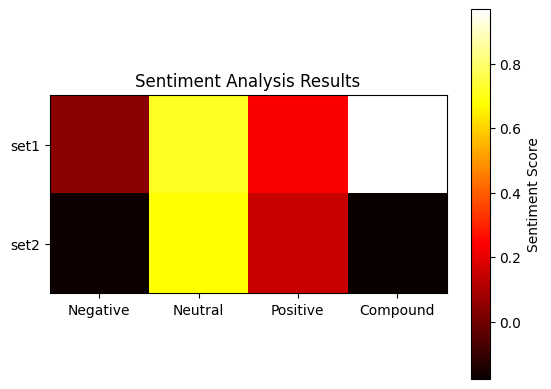

     neg    neu    pos  compound
0  0.046  0.717  0.237    0.9690
1 -0.173  0.682  0.145   -0.1779


In [ ]:
#Create Heatmap for the results
opposite_sentiment_scores = np.array([[0.046 , 0.717 , 0.237 , 0.969],[-0.173, 0.682, 0.145, -0.1779]])
texts = ['set1', 'set2']
sentiments = ['Negative', 'Neutral', 'Positive', 'Compound']

plt.imshow(opposite_sentiment_scores, cmap='hot', interpolation='nearest')
plt.colorbar(label='Sentiment Score')
plt.xticks(np.arange(len(sentiments)), sentiments)
plt.yticks(np.arange(len(texts)), texts)
plt.title('Sentiment Analysis Results')
plt.show()

import pandas as pd
# Sample sentiment scores
sentiment_scores = [
    [0.046 , 0.717 , 0.237 , 0.969],
    [-0.173, 0.682, 0.145, -0.1779]
]

# Create a dataframe to store the sentiment analysis data
sentiment_df = pd.DataFrame(sentiment_scores, columns=['neg', 'neu', 'pos', 'compound'])

# Display the dataframe
print(sentiment_df)

#Sort sentences and Inject more Positive Sentences

In [ ]:
# Inject positive sentences and highlight them
positive_sentences = [
    "A musical performance contract ensures clear expectations and responsibilities for both the artist and the event organizer, leading to a smooth and successful collaboration",
    "By signing a musical performance contract, artists can secure their payment and protect their rights, ensuring they are compensated fairly for their talent and hard work",
    "A well-drafted musical performance contract provides legal protection for both parties involved, minimizing the risk of disputes and misunderstandings",
    "With a musical performance contract in place, artists can have peace of mind knowing that the terms and conditions of their performance, including the duration, venue, and technical requirements, are clearly defined and agreed upon"
    "A musical performance contract allows artists to showcase their talent and reach a wider audience, providing them with valuable exposure and potential career opportunities"
    "By signing a musical performance contract, artists can establish a professional reputation and build credibility in the industry, as it demonstrates their commitment to delivering high-quality performances"
]

highlighted_text = ""
highlighted_sentences = []

for i, sentence in enumerate(sentences):
    if i < len(positive_sentences):
        # Inject positive sentence
        highlighted_sentence = f"**{positive_sentences[i]}**"
        highlighted_sentences.append(highlighted_sentence)
    highlighted_sentences.append(sentence)

highlighted_sentences.sort()
highlighted_text = ". ".join(highlighted_sentences)

# Display the modified text with highlighted positive sentences
display(Markdown(highlighted_text))



sentiment_scores = analyzer.polarity_scores(positive_sentences)

print("Overall Sentiment Score is Positive:",sentiment_scores)
print('-' * 50)






































. 






Free Musical Performance Contract Template & FAQs - Rocket Lawyer
































































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Event contracts













MAKE YOUR FREE Musical Performance Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Musical Performance Contract
            


Make document                    



 


Other Names:
Musical Performance Agreement
Band Performance Contract
Performance Contract
Performer Contract
Artist Performance Contract
Live Performance Contract
Event Performance Contract








What weâll cover



About Musical Performance Contracts


Musical Performance Contract FAQs


Musical Performance Contract checklist






What is a Musical Performance Contract?
A Musical Performance Contract is a legally binding agreement under which a musician or band contracts to provide musical services to a company or an individual. 




Back to top



Back to top












Our quality guarantee
We guarantee our service is safe and secure, and that properly executed Rocket Lawyer legal documents are legally enforceable under applicable US laws.
Need help? No problem!
Ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.



Musical Performance Contract checklist
Complete your free Musical Performance Contract with our Make it Legalâ¢ checklist







Make this document
Customize your Musical Performance Contract by answering simple questions. 




Collapse





Definitions of Musical Performance Contract Terms






Term


Definition 






Alternative Dispute Resolution (ADR)


A method of settling disputes that does not involve litigation or other use of the court system. 



Can my Musical Performance Agreement be checked by a lawyer?





If you opt to do it by yourself, seeking out a legal professional to give feedback on your document could be relatively time-intensive. 



How can I fill out my own performance contract template online for free?





The good news is you do not need to start from scratch when getting your agreement in writing.     



 







About Musical Performance Contracts
Learn how to document your musical performance agreement







Collapse all

|






Expand all








What to include in Musical Performance Contracts


A Musical Performance Contract, also known as a Performance Contract, is an agreement under which a musician or band contracts to provide musical services to a company or an individual.               _____ Share or deliver a copy of the Contract to the other Party.          Other Information          * It is not necessary that the signatures be witnessed or notarized.              _____ Each Party should receive an original signed copy of the Contract.              _____ Use the easy E-signature service to sign electronically without having to print, sign and deliver hard copies.       Copies          _____ Keep a copy of all documents for your own records and in case there is a problem.       Members can always consult an attorney at no extra cost!          * If you have quick questions or wish to review this document with an attorney, you can do so for free.  agrees to indemnify and hold harmless  from all claims, losses, expenses, fees, including attorney fees, costs, and judgments that may be asserted against  that result from the acts or omissions of , 's members, if any, and 's agents.  and  agree that this Contract shall commence on the above date and terminate on .  shall also provide food and other refreshments for .  shall arrive at least one hour before the starting time to set-up and conduct sound check.  shall ensure optimum sound blend and reproduction for the venue size.  shall have an unlimited collection of songs.  shall have high quality microphone and sound equipment.  shall perform music to suit the right mood of the event.  shall provide dressing room facilities for .      CANCELLATION POLICY.      INDEMNIFICATION.    ASSIGNMENT.    GOVERNING LAW.    WAIVER OF CONTRACTUAL RIGHT. (1). (2). (3). (4). **A musical performance contract ensures clear expectations and responsibilities for both the artist and the event organizer, leading to a smooth and successful collaboration**. **A well-drafted musical performance contract provides legal protection for both parties involved, minimizing the risk of disputes and misunderstandings**. **By signing a musical performance contract, artists can secure their payment and protect their rights, ensuring they are compensated fairly for their talent and hard work**. **With a musical performance contract in place, artists can have peace of mind knowing that the terms and conditions of their performance, including the duration, venue, and technical requirements, are clearly defined and agreed uponA musical performance contract allows artists to showcase their talent and reach a wider audience, providing them with valuable exposure and potential career opportunitiesBy signing a musical performance contract, artists can establish a professional reputation and build credibility in the industry, as it demonstrates their commitment to delivering high-quality performances**. A cancellation policy is also a standard policy in the music service industry. A client can require that the musician indemnify the client for any injuries that the musician may encounter or cause through the acts of the musician or the band. A contract between a musician who lives in California and an event organizer based in Nevada, for example, might specify that the laws of Nevada will govern any disputes between the parties related to the contract. A minimum of  notice will be required for cancellation of this Contract. A monetary deposit is a standard policy in the music service industry due to the distinct nature of the industry. A musician, for example, might not be able to assign their obligations to another musician, especially if the original musicianâs performance will be essential to the event.




Governing law


A provision in a contract, also known as âchoice of law,â that identifies which jurisdiction's laws will apply to disputes between the parties. Additional provisions you might consider including here are covered later in this article.
Performance of services
This section covers the details, such as set-up and sound check times. Additionally, this contract contains special provisions unique to musical services, including: performance guidelines, deposits, cancellation policy and other provisions specifically related to the music service industry.
Band or gig contracts are often short and easy to understand. Additionally, this contract contains special provisions unique to musical services, including: performance guidelines, deposits, cancellation policy and other provisions specifically related to the music service industry. 

With signatures from the event organizer and the musician or band, this Musical Performance Contract can help each party to set appropriate expectations.
When can you use a Musical Performance Contract?

You are a musician who wants the security of a contract.
You are hiring musical talent and want a professional agreement.






Sample Musical Performance Contract
The terms in your document will update based on the information you provide





This document has been customized over 10.1K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


    CONTRACT FOR MUSICAL SERVICES     This Musical Performance Contract (this "Contract") is made effective as of  (the "Effective Date") by and between  (""), of , ,  , and  (""), of , ,  . All deposit fees are non-refundable. Although the independent contractor âworksâ for the client, the contract does not create an employer/employee relationship between them. An assignment may be invalid if it materially changes the contract, regardless of whether the contract prohibits assignment. An easier and more cost-effective alternative is to go through Rocket Lawyer attorney services. Any cancellation made with less than  notice prior to the agreed upon service date will result in full payment by . Any notice or communication required or permitted under this Contract shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the address set forth in the opening paragraph or to such other address as one party may have furnished to the other in writing. At the time of signing the Contract,  shall pay a non-refundable deposit of  to  for the Services. Beginning on ,  will provide to  the following musical services (collectively, the "Services"):        PERFORMANCE OF SERVICES. Both parties should set expectations around intoxication and performance. Common requests include bottled water, tea, energy drinks, alcohol, coffee, and food. Courts may review some ADR results, but they are not likely to overturn them without evidence of fraud, duress, or other misconduct.




Assignment


The transfer of the obligation and/or benefits of a contract from one person (the âassignorâ) to another (the âassigneeâ). Details should be specific, for example, exact brand and tech specifics should be provided for PA equipment.
Riders or backstage perks
Most bands do not have the influence to request complicated, expensive backstage accommodations, but many ask for a few hospitality items. Get legal help.




Show more





Back to top





Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Musical Performance Contract also made:





Non-Disclosure Agreement (NDA)
Ensure that proprietary information stays private







Artist-Agent Agreement
Set forth details for artist representation







Recording Agreement
Establish terms for working with a record company







Contract for Services
Set clear terms and conditions for any services






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Musical Performance Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. Get started by visiting the Find a Lawyer tab on our site, or calling (866) 243-2183. Get started now!





Review your contract
Look over your customized Musical Performance Contract to ensure it matches your intentions. However, they can be as complicated as you want them to be depending on the event. If a band member cannot make a performance, the band should have a backup player willing and ready to perform.
Parking and loading/unloading
Bands should know in advance where they can park and load and unload their gear. If a court finds that any provision of this Contract is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited. If any provision of this Contract shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. If the band needs their salespeople to be allowed into the event without a ticket, that should be arranged in advance, as well. If the band needs to cancel, it should be within enough time to book another similar act. If the band or performer wants a copy of the recording for promotional reasons, how that will be shared should be arranged in advance.
Performance expectations
The drunken musician cliche was not fabricated out of thin air. If the cancellation is initiated by , all monies paid to  from  shall be fully refunded, INCLUDING the deposit fee. If the venue or event organizer cancels within a certain period, often the contract will require that the band still be paid in full.
Terms
Usually, performances are singular and just list one date, but if you have a contract for repeated performances, such as once per week, you can create a contract with terms and options for renewal.
Relationship of parties
This indicates, in most cases, that the band or musician is not an employee of the individual, venue, or event organizer. If the venue takes a part of the sale, that should be clearly communicated.
Video and audio recordings
If the performance is recorded, how those recordings are planned to be used should be discussed. If they need to park their vehicle and gear overnight, the organizer or booking person should have suggestions for safe places to park.
Lodging and transportation
Some events pay for musicians to have pre-event or post-event accommodations and may help with transportation costs. If you need to make changes to the Contract outside of the interview, you will be able to make changes online in the Document Manager at the end of the process or downloaded to any word processor. If you sign up for a Premium membership, you can get your agreements reviewed or send specific questions. If you signed a paper copy of your document, you can use Rocket Lawyer to store and share it. In the event a client cancels at the last minute, the musician will have difficulty finding another reservation or booking, therefore resulting in a loss of profit. In the event that an attorney does offer to help you, they would still charge their standard fees to do so. It can also include information such as music type, how long the band is to play per set, the variety of music (limitation of repeats), and etiquette expectations (for example if swearing needs to be limited). It is not necessary that the signatures be witnessed or notarized. It is understood by the parties that  is an independent contractor with respect to , and not an employee of . Location and access information to hotels, homestays, or campsites should be communicated in advance as much as  possible. Most often, the deposit is non-refundable and subtracted from the total amount due after the performance.
Cancellation policy
A cancellation policy protects the musician against possible financial losses if the client decides to cancel the contract on short notice. Most will be short, but if you are managing a large, expensive event, expectations may be more extensive on both sides.
Following is basic information typically included in Musical Performance Contracts:
Name and contact information of both parties
Most often full, real names (rather than stage names) are included, as well as contact information, such as email addresses and phone numbers.
Description of services
This section includes the location and name of the venue as well as the date and time of the performance. Music shall be performed without any significant breaks and throughout the agreed upon period of time. Musical Performance Contracts outline the scope of services, how services are to be performed, and payment terms. Musical performance contracts often specify that the musician is an independent contractor, not an employee.




Severability


A clause in a contract that states that if any other provision of the contract is found by a court of law to be invalid, unlawful, or unenforceable, that provision may be removed without invalidating the rest of the contract. Musical performance services are usually sought out for parties or during special events at halls or restaurants and bars. Neither party may assign or transfer this Contract without the prior written consent of the non-assigning party, which approval shall not be unreasonably withheld. Occasions such as birthdays and wedding receptions typically demand musical performance services. Often, the venue can save money by providing catering services backstage and limit requests to dietary restrictions.
Merchandise sales
Bands should know if they can sell merchandise, and if so, if there is a designated area for sales and tables available. Or, print and sign hard copies of your Contract in duplicate. Or, print and sign hard copies of your Contract in duplicate.

It becomes effective as of the date specified in the Contract.

Securely sign online and invite others to sign with RocketSignÂ®





Everyone gets a copy
Keep a copy of all documents for your own records and in case there is a problem.

Each Party should receive an original signed copy of the Contract. Ordinarily, given the level of customization, you might ultimately pay a conventional lawyer fees in the hundreds of dollars, if not more.
If you have any doubts before getting started, ask a lawyer, or browse our full repository of business documents. Original copies should be kept in a fireproof and safe location. Our legal plans give families and businesses free legal documents, affordable access to licensed attorneys, plus a whole lot more. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. Plus, you can always save and continue later once youâve started your document creation process. Refund shall be paid out at month's end. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Rocket Lawyer's On CallÂ® service makes it fast and easy to speak with a local attorney. Safe and secure in your Rocket Lawyer File Manager, you can access it any time from any computer, as well as share it for future reference. Said agreement may be extended and/or renewed by agreement of all parties in writing thereafter. Severing a provision may still render a contract invalid if the contract is unworkable without that provision.




Waiver


A contractual provision stating that the waiver of any rights by either party under the contract does not prevent them from asserting those or other rights later. Share or deliver a copy of the Contract to the other Party. Some also include in this section the sound equipment and expertise the band is expected to bring.
Payment
Payment information includes how much is to be paid for the performance, when it will be paid, and how it will be paid. Some lawyers may not even agree to review a contract if they were not the author. Some venues will put out signage directing the bands where to go. The Musical Performance Contract typically provides a detailed description of the payment terms agreed upon by both parties. The assignee steps into the assignorâs shoes and assumes any and all responsibilities that they have under the contract.
A contract may specifically prohibit assignment by one or both parties. The contract described above might state that any lawsuit must be filed in Clark County, Nevada.




Indemnity


An agreement that one party to a contract will cover the other party against liability for matters that are the first partyâs responsibility. The contract usually outlines a single lump sum payment to be made at the completion of the musical service. The deposit protects the musician against possible financial losses if the client cancels. The deposit will be subtracted from the total payment owed by  upon completion of the Services. The failure of either party to enforce any provision of this Contract shall not be construed as a waiver of limitation of that party's right to subsequently enforce and compel strict compliance with every provision of this Contract. The most common forms of ADR are:

Negotiation.
Mediation.
Arbitration.

The outcome of certain types of ADR may be binding on the parties if they agree to that in advance. The parties to a contract may agree to use a specific form of Alternative Dispute Resolution (ADR) to resolve any disputes that arise in relation to the contract. These are often "act of god" events such as floods or earthquakes.
Some additional information or terms you may want to add to the Description of Services section of your contract include:
Equipment and layout
It is helpful if the bands know in advance things like what kind of power is available, lighting provided, sound equipment details, drum riser specs, and so on. This Agreement is effective as of the date first above written. This Agreement shall be signed by ,  on behalf of  and by ,  on behalf of . This Contract contains the entire Contract of the parties, and there are no other promises or conditions in any other contract whether oral or written concerning the subject matter of this Contract. This Contract may be modified or amended in writing, if the writing is signed by the party obligated under the amendment. This Contract shall be governed by the laws of the State of Commonwealth of . This Contract supersedes any prior written or oral agreements between the parties. This allows the parties to be flexible about how they assert their rights. This contract outlines the scope of services, how the service is to be performed, and payment terms. This essentially means that the musician is responsible if something or someone is harmed because of the acts committed by the musician or band.
On the other hand, if a contract states that a venue owner will be solely responsible for maintaining the safety of the premises where the performance will take place, the venue owner must cover (âindemnifyâ) the musician in the event that someone sues the musician for a slip-and-fall accident at the venue.




Independent contractor


A self-employed individual or business that enters into a contract to provide services to another individual or business, often known as the client. This helps relieve liability issues.
Force Majeure
This simply means something like 'superior force.' This section outlines rules about what things could happen that would release both parties from the agreement without consequences. This is not common, however, for small venues, but popular bands with busy schedules may require a deposit to guarantee their services. This provision allows for a musician to receive full payment if the client cancels the contract without enough prior notice. This section outlines the minimum time required for giving notice of cancellation. This type of clause also often specifies where either party must file a lawsuit. Transportation costs such as gas or airfare (including airport shuttles) should be agreed upon before the day of the event.
Signing instructions
This Musical Performance Contract should be signed by authorized representatives of both parties and becomes effective as of the date specified in the contract. Use RocketSignÂ® to sign electronically without having to print, sign and deliver hard copies. Using electronic signatures can save time, and make contracts easier to manage and store. 
If you plan to print and sign hard copies of the contract, you may want to sign two copies of the contract so that each party will have a copy with original signatures. Weâll help you along the way and build a document that fits your needs. When using the document tools on Rocket Lawyer, any musician should feel empowered to draft a free Musical Performance Contract with ease. Whether you are doing a solo gig or a full band setup, it is always crucial to record the details of your shows. Whether you decide to produce more copies of your Musical Performance Agreement or other agreements for your business, we'll be here to support you. With a waiver clause, a party does not have to file a claim for breach of contract every time the other party makes a mistake.



 




Collapse












Musical Performance Contract FAQs








Collapse all

|






Expand all







As a musician, should I always create a contract for musical performances?





It only takes one no-show or one venue not paying your band for both parties to learn that Musical Performance Contracts are a smart idea. You can share your document from your account.




Other Information

It is not necessary that the signatures be witnessed or notarized.
Members can always consult an attorney at no extra cost!
If you have questions or wish to review this document with an attorney, get the legal advice you need with Rocket Lawyer network attorneys. You may also want to review the agreement with any other parties to avoid delays at signing.

Remember that if you have any questions you can easily ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.





Sign this document
This document needs to be signed by:
 

The lender(s) -- or a qualified representative on behalf of a company or organization
The borrower(s) -- or a qualified representative on behalf of a company or organization
Any cosigners


The Contract can be signed online. You might consider including additional provisions related to monetary payments, such as a deposit section or a cancellation policy.
Deposit
A deposit is a non-refundable monetary fee that the musician can require a client to pay at the time of contracting for services. You might decide to use a Musical Performance Contract because, when done properly, it yields the benefits listed here:

Neither party is confused about compensation
The duration of the performance is agreed upon
Both parties understand the scope of their responsibilities

If you decide against making a Band Contract, you may not experience any of the protections connected to having one. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. Your contract will be built step by step, so you can feel confident that it has the proper details that you'll need. Your copy should be kept in a safe place. Your copy should be kept in a safe place.

If you sign this agreement online a copy will be securely stored in your account.      DEPOSIT.      ENTIRE CONTRACT.     DESCRIPTION OF SERVICES.     RELATIONSHIP OF PARTIES.     SIGNATORIES.     TERM.         Client:               By:   Date:              Musician:               By:   Date:                  Final Checklist for Contract for Musical Services Company:  Service Provider:     Rocket Lawyer is the easy and affordable legal service for everyone -- giving you the legal help you need at a price you'll love.   AMENDMENT.   NOTICE.   Next Steps: Make it Legal          _____ Look over the Contract to ensure it matches your intentions.   SEVERABILITY

Overall Sentiment Score is Positive: {'neg': 0.032, 'neu': 0.75, 'pos': 0.218, 'compound': 0.9831}
--------------------------------------------------


#Sort sentences and Inject more Negative sentences

In [ ]:
negative_sentences = [
    "The terms of the Musical Performance Contract were highly restrictive, limiting the artist's creative freedom and artistic expression",
    "The contract failed to provide adequate compensation for the artist's performance, resulting in financial strain and dissatisfaction",
    "The contract lacked clear provisions for cancellation or rescheduling of performances, leading to disputes and conflicts between the artist and the event organizers",
    "The contract imposed excessive penalties and fines on the artist for any breach of contract, creating a sense of fear and insecurity",
    "The contract did not include provisions for intellectual property rights, leaving the artist vulnerable to unauthorized use or exploitation of their work",
    "The contract placed all liability and responsibility on the artist, without any shared accountability from the event organizers, putting the artist at a significant disadvantage"
]

highlighted_text_negative = ""
for i, sentence in enumerate(sentences):
    if i < len(negative_sentences):
        # Inject negative sentence
        highlighted_sentence_negative = f"**{negative_sentences[i]}**"
        highlighted_text_negative += highlighted_sentence_negative + ". "
    highlighted_text_negative += sentence + ". "

highlighted_text_negative = highlighted_text_negative.split('. ')
highlighted_text_negative.sort()
highlighted_text_negative = '. '.join(highlighted_text_negative)
# Display the modified text with highlighted negative sentences
display(Markdown(highlighted_text_negative))

negative_sentiment_scores = analyzer.polarity_scores(negative_sentences)
negative_sentiment_scores['neg'] *= -1
negative_sentiment_scores['compound'] *= 1

# Determine if overall sentiment is negative
overall_sentiment_scores = analyzer.polarity_scores(text)
if overall_sentiment_scores['neg'] < overall_sentiment_scores['pos']:
    print("Overall Sentiment Score is Negative:", negative_sentiment_scores)
print('-' * 50)


. 


































. 






Free Musical Performance Contract Template & FAQs - Rocket Lawyer
































































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Event contracts













MAKE YOUR FREE Musical Performance Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Musical Performance Contract
            


Make document                    



 


Other Names:
Musical Performance Agreement
Band Performance Contract
Performance Contract
Performer Contract
Artist Performance Contract
Live Performance Contract
Event Performance Contract








What weâll cover



About Musical Performance Contracts


Musical Performance Contract FAQs


Musical Performance Contract checklist






What is a Musical Performance Contract?
A Musical Performance Contract is a legally binding agreement under which a musician or band contracts to provide musical services to a company or an individual. 




Back to top



Back to top












Our quality guarantee
We guarantee our service is safe and secure, and that properly executed Rocket Lawyer legal documents are legally enforceable under applicable US laws.
Need help? No problem!
Ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.



Musical Performance Contract checklist
Complete your free Musical Performance Contract with our Make it Legalâ¢ checklist







Make this document
Customize your Musical Performance Contract by answering simple questions. 




Collapse





Definitions of Musical Performance Contract Terms






Term


Definition 






Alternative Dispute Resolution (ADR)


A method of settling disputes that does not involve litigation or other use of the court system. 



Can my Musical Performance Agreement be checked by a lawyer?





If you opt to do it by yourself, seeking out a legal professional to give feedback on your document could be relatively time-intensive. 



How can I fill out my own performance contract template online for free?





The good news is you do not need to start from scratch when getting your agreement in writing.     



 







About Musical Performance Contracts
Learn how to document your musical performance agreement







Collapse all

|






Expand all








What to include in Musical Performance Contracts


A Musical Performance Contract, also known as a Performance Contract, is an agreement under which a musician or band contracts to provide musical services to a company or an individual.               _____ Share or deliver a copy of the Contract to the other Party.          Other Information          * It is not necessary that the signatures be witnessed or notarized.              _____ Each Party should receive an original signed copy of the Contract.              _____ Use the easy E-signature service to sign electronically without having to print, sign and deliver hard copies.       Copies          _____ Keep a copy of all documents for your own records and in case there is a problem.       Members can always consult an attorney at no extra cost!          * If you have quick questions or wish to review this document with an attorney, you can do so for free.  agrees to indemnify and hold harmless  from all claims, losses, expenses, fees, including attorney fees, costs, and judgments that may be asserted against  that result from the acts or omissions of , 's members, if any, and 's agents.  and  agree that this Contract shall commence on the above date and terminate on .  shall also provide food and other refreshments for .  shall arrive at least one hour before the starting time to set-up and conduct sound check.  shall ensure optimum sound blend and reproduction for the venue size.  shall have an unlimited collection of songs.  shall have high quality microphone and sound equipment.  shall perform music to suit the right mood of the event.  shall provide dressing room facilities for .      CANCELLATION POLICY.      INDEMNIFICATION.    ASSIGNMENT.    GOVERNING LAW.    WAIVER OF CONTRACTUAL RIGHT. (1). (2). (3). (4). **The contract did not include provisions for intellectual property rights, leaving the artist vulnerable to unauthorized use or exploitation of their work**. **The contract failed to provide adequate compensation for the artist's performance, resulting in financial strain and dissatisfaction**. **The contract imposed excessive penalties and fines on the artist for any breach of contract, creating a sense of fear and insecurity**. **The contract lacked clear provisions for cancellation or rescheduling of performances, leading to disputes and conflicts between the artist and the event organizers**. **The contract placed all liability and responsibility on the artist, without any shared accountability from the event organizers, putting the artist at a significant disadvantage**. **The terms of the Musical Performance Contract were highly restrictive, limiting the artist's creative freedom and artistic expression**. A cancellation policy is also a standard policy in the music service industry. A client can require that the musician indemnify the client for any injuries that the musician may encounter or cause through the acts of the musician or the band. A contract between a musician who lives in California and an event organizer based in Nevada, for example, might specify that the laws of Nevada will govern any disputes between the parties related to the contract. A minimum of  notice will be required for cancellation of this Contract. A monetary deposit is a standard policy in the music service industry due to the distinct nature of the industry. A musician, for example, might not be able to assign their obligations to another musician, especially if the original musicianâs performance will be essential to the event.




Governing law


A provision in a contract, also known as âchoice of law,â that identifies which jurisdiction's laws will apply to disputes between the parties. Additional provisions you might consider including here are covered later in this article.
Performance of services
This section covers the details, such as set-up and sound check times. Additionally, this contract contains special provisions unique to musical services, including: performance guidelines, deposits, cancellation policy and other provisions specifically related to the music service industry.
Band or gig contracts are often short and easy to understand. Additionally, this contract contains special provisions unique to musical services, including: performance guidelines, deposits, cancellation policy and other provisions specifically related to the music service industry. 

With signatures from the event organizer and the musician or band, this Musical Performance Contract can help each party to set appropriate expectations.
When can you use a Musical Performance Contract?

You are a musician who wants the security of a contract.
You are hiring musical talent and want a professional agreement.






Sample Musical Performance Contract
The terms in your document will update based on the information you provide





This document has been customized over 10.1K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


    CONTRACT FOR MUSICAL SERVICES     This Musical Performance Contract (this "Contract") is made effective as of  (the "Effective Date") by and between  (""), of , ,  , and  (""), of , ,  . All deposit fees are non-refundable. Although the independent contractor âworksâ for the client, the contract does not create an employer/employee relationship between them. An assignment may be invalid if it materially changes the contract, regardless of whether the contract prohibits assignment. An easier and more cost-effective alternative is to go through Rocket Lawyer attorney services. Any cancellation made with less than  notice prior to the agreed upon service date will result in full payment by . Any notice or communication required or permitted under this Contract shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the address set forth in the opening paragraph or to such other address as one party may have furnished to the other in writing. At the time of signing the Contract,  shall pay a non-refundable deposit of  to  for the Services. Beginning on ,  will provide to  the following musical services (collectively, the "Services"):        PERFORMANCE OF SERVICES. Both parties should set expectations around intoxication and performance. Common requests include bottled water, tea, energy drinks, alcohol, coffee, and food. Courts may review some ADR results, but they are not likely to overturn them without evidence of fraud, duress, or other misconduct.




Assignment


The transfer of the obligation and/or benefits of a contract from one person (the âassignorâ) to another (the âassigneeâ). Details should be specific, for example, exact brand and tech specifics should be provided for PA equipment.
Riders or backstage perks
Most bands do not have the influence to request complicated, expensive backstage accommodations, but many ask for a few hospitality items. Get legal help.




Show more





Back to top





Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Musical Performance Contract also made:





Non-Disclosure Agreement (NDA)
Ensure that proprietary information stays private







Artist-Agent Agreement
Set forth details for artist representation







Recording Agreement
Establish terms for working with a record company







Contract for Services
Set clear terms and conditions for any services






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Musical Performance Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. Get started by visiting the Find a Lawyer tab on our site, or calling (866) 243-2183. Get started now!





Review your contract
Look over your customized Musical Performance Contract to ensure it matches your intentions. However, they can be as complicated as you want them to be depending on the event. If a band member cannot make a performance, the band should have a backup player willing and ready to perform.
Parking and loading/unloading
Bands should know in advance where they can park and load and unload their gear. If a court finds that any provision of this Contract is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited. If any provision of this Contract shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. If the band needs their salespeople to be allowed into the event without a ticket, that should be arranged in advance, as well. If the band needs to cancel, it should be within enough time to book another similar act. If the band or performer wants a copy of the recording for promotional reasons, how that will be shared should be arranged in advance.
Performance expectations
The drunken musician cliche was not fabricated out of thin air. If the cancellation is initiated by , all monies paid to  from  shall be fully refunded, INCLUDING the deposit fee. If the venue or event organizer cancels within a certain period, often the contract will require that the band still be paid in full.
Terms
Usually, performances are singular and just list one date, but if you have a contract for repeated performances, such as once per week, you can create a contract with terms and options for renewal.
Relationship of parties
This indicates, in most cases, that the band or musician is not an employee of the individual, venue, or event organizer. If the venue takes a part of the sale, that should be clearly communicated.
Video and audio recordings
If the performance is recorded, how those recordings are planned to be used should be discussed. If they need to park their vehicle and gear overnight, the organizer or booking person should have suggestions for safe places to park.
Lodging and transportation
Some events pay for musicians to have pre-event or post-event accommodations and may help with transportation costs. If you need to make changes to the Contract outside of the interview, you will be able to make changes online in the Document Manager at the end of the process or downloaded to any word processor. If you sign up for a Premium membership, you can get your agreements reviewed or send specific questions. If you signed a paper copy of your document, you can use Rocket Lawyer to store and share it. In the event a client cancels at the last minute, the musician will have difficulty finding another reservation or booking, therefore resulting in a loss of profit. In the event that an attorney does offer to help you, they would still charge their standard fees to do so. It can also include information such as music type, how long the band is to play per set, the variety of music (limitation of repeats), and etiquette expectations (for example if swearing needs to be limited). It is not necessary that the signatures be witnessed or notarized. It is understood by the parties that  is an independent contractor with respect to , and not an employee of . Location and access information to hotels, homestays, or campsites should be communicated in advance as much as  possible. Most often, the deposit is non-refundable and subtracted from the total amount due after the performance.
Cancellation policy
A cancellation policy protects the musician against possible financial losses if the client decides to cancel the contract on short notice. Most will be short, but if you are managing a large, expensive event, expectations may be more extensive on both sides.
Following is basic information typically included in Musical Performance Contracts:
Name and contact information of both parties
Most often full, real names (rather than stage names) are included, as well as contact information, such as email addresses and phone numbers.
Description of services
This section includes the location and name of the venue as well as the date and time of the performance. Music shall be performed without any significant breaks and throughout the agreed upon period of time. Musical Performance Contracts outline the scope of services, how services are to be performed, and payment terms. Musical performance contracts often specify that the musician is an independent contractor, not an employee.




Severability


A clause in a contract that states that if any other provision of the contract is found by a court of law to be invalid, unlawful, or unenforceable, that provision may be removed without invalidating the rest of the contract. Musical performance services are usually sought out for parties or during special events at halls or restaurants and bars. Neither party may assign or transfer this Contract without the prior written consent of the non-assigning party, which approval shall not be unreasonably withheld. Occasions such as birthdays and wedding receptions typically demand musical performance services. Often, the venue can save money by providing catering services backstage and limit requests to dietary restrictions.
Merchandise sales
Bands should know if they can sell merchandise, and if so, if there is a designated area for sales and tables available. Or, print and sign hard copies of your Contract in duplicate. Or, print and sign hard copies of your Contract in duplicate.

It becomes effective as of the date specified in the Contract.

Securely sign online and invite others to sign with RocketSignÂ®





Everyone gets a copy
Keep a copy of all documents for your own records and in case there is a problem.

Each Party should receive an original signed copy of the Contract. Ordinarily, given the level of customization, you might ultimately pay a conventional lawyer fees in the hundreds of dollars, if not more.
If you have any doubts before getting started, ask a lawyer, or browse our full repository of business documents. Original copies should be kept in a fireproof and safe location. Our legal plans give families and businesses free legal documents, affordable access to licensed attorneys, plus a whole lot more. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. Plus, you can always save and continue later once youâve started your document creation process. Refund shall be paid out at month's end. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Rocket Lawyer's On CallÂ® service makes it fast and easy to speak with a local attorney. Safe and secure in your Rocket Lawyer File Manager, you can access it any time from any computer, as well as share it for future reference. Said agreement may be extended and/or renewed by agreement of all parties in writing thereafter. Severing a provision may still render a contract invalid if the contract is unworkable without that provision.




Waiver


A contractual provision stating that the waiver of any rights by either party under the contract does not prevent them from asserting those or other rights later. Share or deliver a copy of the Contract to the other Party. Some also include in this section the sound equipment and expertise the band is expected to bring.
Payment
Payment information includes how much is to be paid for the performance, when it will be paid, and how it will be paid. Some lawyers may not even agree to review a contract if they were not the author. Some venues will put out signage directing the bands where to go. The Musical Performance Contract typically provides a detailed description of the payment terms agreed upon by both parties. The assignee steps into the assignorâs shoes and assumes any and all responsibilities that they have under the contract.
A contract may specifically prohibit assignment by one or both parties. The contract described above might state that any lawsuit must be filed in Clark County, Nevada.




Indemnity


An agreement that one party to a contract will cover the other party against liability for matters that are the first partyâs responsibility. The contract usually outlines a single lump sum payment to be made at the completion of the musical service. The deposit protects the musician against possible financial losses if the client cancels. The deposit will be subtracted from the total payment owed by  upon completion of the Services. The failure of either party to enforce any provision of this Contract shall not be construed as a waiver of limitation of that party's right to subsequently enforce and compel strict compliance with every provision of this Contract. The most common forms of ADR are:

Negotiation.
Mediation.
Arbitration.

The outcome of certain types of ADR may be binding on the parties if they agree to that in advance. The parties to a contract may agree to use a specific form of Alternative Dispute Resolution (ADR) to resolve any disputes that arise in relation to the contract. These are often "act of god" events such as floods or earthquakes.
Some additional information or terms you may want to add to the Description of Services section of your contract include:
Equipment and layout
It is helpful if the bands know in advance things like what kind of power is available, lighting provided, sound equipment details, drum riser specs, and so on. This Agreement is effective as of the date first above written. This Agreement shall be signed by ,  on behalf of  and by ,  on behalf of . This Contract contains the entire Contract of the parties, and there are no other promises or conditions in any other contract whether oral or written concerning the subject matter of this Contract. This Contract may be modified or amended in writing, if the writing is signed by the party obligated under the amendment. This Contract shall be governed by the laws of the State of Commonwealth of . This Contract supersedes any prior written or oral agreements between the parties. This allows the parties to be flexible about how they assert their rights. This contract outlines the scope of services, how the service is to be performed, and payment terms. This essentially means that the musician is responsible if something or someone is harmed because of the acts committed by the musician or band.
On the other hand, if a contract states that a venue owner will be solely responsible for maintaining the safety of the premises where the performance will take place, the venue owner must cover (âindemnifyâ) the musician in the event that someone sues the musician for a slip-and-fall accident at the venue.




Independent contractor


A self-employed individual or business that enters into a contract to provide services to another individual or business, often known as the client. This helps relieve liability issues.
Force Majeure
This simply means something like 'superior force.' This section outlines rules about what things could happen that would release both parties from the agreement without consequences. This is not common, however, for small venues, but popular bands with busy schedules may require a deposit to guarantee their services. This provision allows for a musician to receive full payment if the client cancels the contract without enough prior notice. This section outlines the minimum time required for giving notice of cancellation. This type of clause also often specifies where either party must file a lawsuit. Transportation costs such as gas or airfare (including airport shuttles) should be agreed upon before the day of the event.
Signing instructions
This Musical Performance Contract should be signed by authorized representatives of both parties and becomes effective as of the date specified in the contract. Use RocketSignÂ® to sign electronically without having to print, sign and deliver hard copies. Using electronic signatures can save time, and make contracts easier to manage and store. 
If you plan to print and sign hard copies of the contract, you may want to sign two copies of the contract so that each party will have a copy with original signatures. Weâll help you along the way and build a document that fits your needs. When using the document tools on Rocket Lawyer, any musician should feel empowered to draft a free Musical Performance Contract with ease. Whether you are doing a solo gig or a full band setup, it is always crucial to record the details of your shows. Whether you decide to produce more copies of your Musical Performance Agreement or other agreements for your business, we'll be here to support you. With a waiver clause, a party does not have to file a claim for breach of contract every time the other party makes a mistake.



 




Collapse












Musical Performance Contract FAQs








Collapse all

|






Expand all







As a musician, should I always create a contract for musical performances?





It only takes one no-show or one venue not paying your band for both parties to learn that Musical Performance Contracts are a smart idea. You can share your document from your account.




Other Information

It is not necessary that the signatures be witnessed or notarized.
Members can always consult an attorney at no extra cost!
If you have questions or wish to review this document with an attorney, get the legal advice you need with Rocket Lawyer network attorneys. You may also want to review the agreement with any other parties to avoid delays at signing.

Remember that if you have any questions you can easily ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.





Sign this document
This document needs to be signed by:
 

The lender(s) -- or a qualified representative on behalf of a company or organization
The borrower(s) -- or a qualified representative on behalf of a company or organization
Any cosigners


The Contract can be signed online. You might consider including additional provisions related to monetary payments, such as a deposit section or a cancellation policy.
Deposit
A deposit is a non-refundable monetary fee that the musician can require a client to pay at the time of contracting for services. You might decide to use a Musical Performance Contract because, when done properly, it yields the benefits listed here:

Neither party is confused about compensation
The duration of the performance is agreed upon
Both parties understand the scope of their responsibilities

If you decide against making a Band Contract, you may not experience any of the protections connected to having one. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. Your contract will be built step by step, so you can feel confident that it has the proper details that you'll need. Your copy should be kept in a safe place. Your copy should be kept in a safe place.

If you sign this agreement online a copy will be securely stored in your account.      DEPOSIT.      ENTIRE CONTRACT.     DESCRIPTION OF SERVICES.     RELATIONSHIP OF PARTIES.     SIGNATORIES.     TERM.         Client:               By:   Date:              Musician:               By:   Date:                  Final Checklist for Contract for Musical Services Company:  Service Provider:     Rocket Lawyer is the easy and affordable legal service for everyone -- giving you the legal help you need at a price you'll love.   AMENDMENT.   NOTICE.   Next Steps: Make it Legal          _____ Look over the Contract to ensure it matches your intentions.   SEVERABILITY

Overall Sentiment Score is Negative: {'neg': -0.152, 'neu': 0.719, 'pos': 0.129, 'compound': -0.0864}
--------------------------------------------------


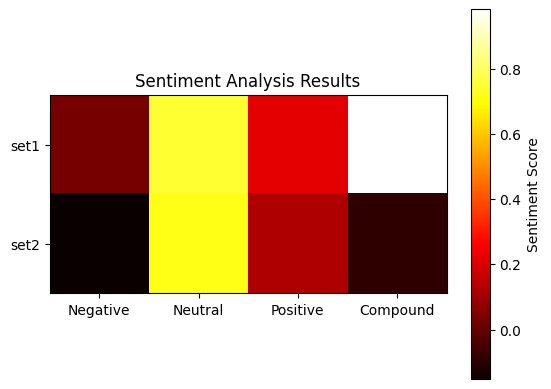

In [ ]:
#Create Heatmap for the results
sentiment_heatmap = np.array([[0.032, 0.75 , 0.218 , 0.9831],[-0.152 , 0.719, 0.129 , -0.0864]])
texts = ['set1', 'set2']
sentiments = ['Negative', 'Neutral', 'Positive', 'Compound']

plt.imshow(sentiment_heatmap, cmap='hot', interpolation='nearest')
plt.colorbar(label='Sentiment Score')
plt.xticks(np.arange(len(sentiments)), sentiments)
plt.yticks(np.arange(len(texts)), texts)
plt.title('Sentiment Analysis Results')
plt.show()